Hand 1: Left hand with confidence 0.9892317652702332
WRIST: x: 0.5533086
y: 0.70467234
z: 2.628792e-07

THUMB_CMC: x: 0.6002364
y: 0.6424629
z: 0.009219185

THUMB_MCP: x: 0.6167016
y: 0.54279166
z: 0.011128906

THUMB_IP: x: 0.62922144
y: 0.4736261
z: 0.006419457

THUMB_TIP: x: 0.6451428
y: 0.4166781
z: 0.0006092647

INDEX_FINGER_MCP: x: 0.56418556
y: 0.4427436
z: 0.01263515

INDEX_FINGER_PIP: x: 0.5538375
y: 0.34113747
z: -0.0013887571

INDEX_FINGER_DIP: x: 0.5728107
y: 0.28702193
z: -0.013628456

INDEX_FINGER_TIP: x: 0.5947706
y: 0.25721216
z: -0.021528358

MIDDLE_FINGER_MCP: x: 0.5442419
y: 0.44964916
z: -0.0056304443

MIDDLE_FINGER_PIP: x: 0.5279282
y: 0.32245818
z: -0.021510847

MIDDLE_FINGER_DIP: x: 0.56001216
y: 0.26342598
z: -0.03416417

MIDDLE_FINGER_TIP: x: 0.59161437
y: 0.24266787
z: -0.041439347

RING_FINGER_MCP: x: 0.5276644
y: 0.4728389
z: -0.025494715

RING_FINGER_PIP: x: 0.51993215
y: 0.35016775
z: -0.04476618

RING_FINGER_DIP: x: 0.56043303
y: 0.31019747
z: -0.055542346

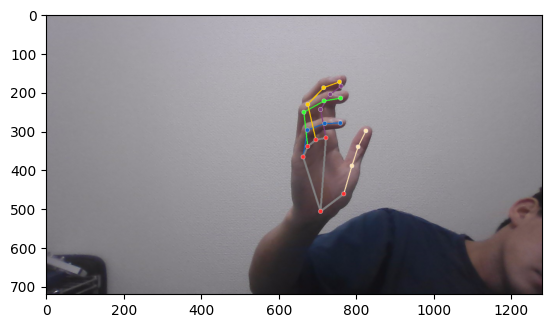

In [10]:
# ファイル名の取得に使用
import os
# 画像処理に使用
import cv2
import mediapipe as mp
# 静止画表示に使用
import matplotlib.pyplot as plt
%matplotlib inline

# Initialize Mediapipe Hands
hands = mp.solutions.hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.5)

# Load an image
image = cv2.flip(cv2.imread('./hands/006.JPG'), 1)

# Process the image and get hand landmarks
results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# List of detected hands
handedness = results.multi_handedness

# Print handedness information
for idx, hand in enumerate(handedness):
    print(f"Hand {idx + 1}: {hand.classification[0].label} hand with confidence {hand.classification[0].score}")

# List of detected landmarks
landmark_list = ['WRIST', 'THUMB_CMC', 'THUMB_MCP', 'THUMB_IP', 'THUMB_TIP', 'INDEX_FINGER_MCP', 'INDEX_FINGER_PIP', 'INDEX_FINGER_DIP', 'INDEX_FINGER_TIP', 'MIDDLE_FINGER_MCP', 'MIDDLE_FINGER_PIP', 'MIDDLE_FINGER_DIP', 'MIDDLE_FINGER_TIP', 'RING_FINGER_MCP', 'RING_FINGER_PIP', 'RING_FINGER_DIP', 'RING_FINGER_TIP', 'PINKY_MCP', 'PINKY_PIP', 'PINKY_DIP', 'PINKY_TIP']

# Print landmark information
for hand_landmarks in results.multi_hand_landmarks:
    for i in range(21):
        print(f"{landmark_list[i]}: {hand_landmarks.landmark[i]}")

# Draw landmarks on the image
annotated_image = image.copy()
for hand_landmarks in results.multi_hand_landmarks:
    mp.solutions.drawing_utils.draw_landmarks(
        annotated_image,
        hand_landmarks,
        mp.solutions.hands.HAND_CONNECTIONS,
        mp.solutions.drawing_styles.get_default_hand_landmarks_style(),
        mp.solutions.drawing_styles.get_default_hand_connections_style()
    )

# Display the annotated image
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.show()


In [18]:
import cv2
import mediapipe as mp

# Initialize Mediapipe Hands
hands = mp.solutions.hands.Hands(
    max_num_hands=2,
    min_detection_confidence=0.5)

# Open a connection to the camera (0 corresponds to the default camera)
cap = cv2.VideoCapture(0)

while cap.isOpened():
    # Read a frame from the camera
    ret, frame = cap.read()
    
    if not ret:
        break
    
    # Flip the frame horizontally for a later selfie-view display
    frame = cv2.flip(frame, 1)
    
    # Process the frame and get hand landmarks
    results = hands.process(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

    # Check if hands are detected
    if results.multi_hand_landmarks:
        # Draw landmarks on the frame
        for hand_landmarks in results.multi_hand_landmarks:
            mp.solutions.drawing_utils.draw_landmarks(
                frame,
                hand_landmarks,
                mp.solutions.hands.HAND_CONNECTIONS,
                mp.solutions.drawing_styles.get_default_hand_landmarks_style(),
                mp.solutions.drawing_styles.get_default_hand_connections_style()
            )

    # Display the annotated frame in a new window
    cv2.imshow("Hand Tracking", frame)

    # Exit the loop when 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the camera and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()


In [3]:
import cv2
import mediapipe as mp

# Initialize Mediapipe Hands
hands = mp.solutions.hands.Hands(
    max_num_hands=2,
    min_detection_confidence=0.5)

# Open a connection to the camera (0 corresponds to the default camera)
cap = cv2.VideoCapture(0)

# Get the frame width, height, and frames per second information
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
fps = cap.get(5)

# Define the new size for the video
new_width = int(frame_width / 2)
new_height = int(frame_height / 2)

# Define the codec and create a VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('hand_tracking_video.mp4', fourcc, fps, (new_width, new_height))

# Set the recording duration (10 seconds in this case)
record_duration = 20  # in seconds
end_time = cv2.getTickCount() + record_duration * cv2.getTickFrequency()

while cap.isOpened() and cv2.getTickCount() < end_time:
    # Read a frame from the camera
    ret, frame = cap.read()

    if not ret:
        break

    # Flip the frame horizontally for a later selfie-view display
    frame = cv2.flip(frame, 1)

    # Resize the frame
    frame = cv2.resize(frame, (new_width, new_height))

    # Process the frame and get hand landmarks
    results = hands.process(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

    # Check if hands are detected
    if results.multi_hand_landmarks:
        # Draw landmarks on the frame
        for hand_landmarks in results.multi_hand_landmarks:
            mp.solutions.drawing_utils.draw_landmarks(
                frame,
                hand_landmarks,
                mp.solutions.hands.HAND_CONNECTIONS,
                mp.solutions.drawing_styles.get_default_hand_landmarks_style(),
                mp.solutions.drawing_styles.get_default_hand_connections_style()
            )

    # Display the annotated frame in a new window
    cv2.imshow("Hand Tracking", frame)

    # Write the frame to the output video file
    out.write(frame)

    # Exit the loop when 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the camera, video writer, and close all OpenCV windows
cap.release()
out.release()
cv2.destroyAllWindows()


In [21]:
import cv2
import mediapipe as mp

# Initialize Mediapipe Hands
hands = mp.solutions.hands.Hands(
    max_num_hands=2,
    min_detection_confidence=0.5)

# Open a connection to the camera (0 corresponds to the default camera)
cap = cv2.VideoCapture(0)

while cap.isOpened():
    # Read a frame from the camera
    ret, frame = cap.read()
    
    if not ret:
        break
    
    # Flip the frame horizontally for a later selfie-view display
    frame = cv2.flip(frame, 1)
    
    # Process the frame and get hand landmarks
    results = hands.process(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

    # Check if hands are detected
    if results.multi_hand_landmarks:
        # Draw landmarks on the frame
        for hand_landmarks in results.multi_hand_landmarks:
            mp.solutions.drawing_utils.draw_landmarks(
                frame,
                hand_landmarks,
                mp.solutions.hands.HAND_CONNECTIONS,
                mp.solutions.drawing_styles.get_default_hand_landmarks_style(),
                mp.solutions.drawing_styles.get_default_hand_connections_style()
            )
            
            # Get the coordinates of the index finger tip (landmark 8)
            index_finger_tip = hand_landmarks.landmark[8]
            height, width, _ = frame.shape
            x_pixel = int(index_finger_tip.x * width)
            y_pixel = int(index_finger_tip.y * height)
            
            # Display the index finger tip coordinates on the screen
            cv2.putText(frame, f"Index Finger Tip: ({x_pixel}, {y_pixel})", (10, 30),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)

    # Display the annotated frame in a new window
    cv2.imshow("Hand Tracking", frame)

    # Exit the loop when 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the camera and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()


In [2]:
import cv2
import mediapipe as mp

hands = mp.solutions.hands.Hands(
    max_num_hands=1,
    min_detection_confidence=0.5)

cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    
    if not ret:
        break
    
    frame = cv2.flip(frame, 1)
    
    results = hands.process(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:

            index_finger_tip = hand_landmarks.landmark[8]
            height, width, _ = frame.shape
            x_pixel = int(index_finger_tip.x * width)
            y_pixel = int(index_finger_tip.y * height)
            
            cv2.rectangle(frame, (x_pixel - 10, y_pixel - 10), (x_pixel + 10, y_pixel + 10), (0, 0, 255), 2)
            
            cv2.putText(frame, f"Index Finger Tip: ({x_pixel}, {y_pixel})", (10, 30),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)

    cv2.imshow("Hand Tracking", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


In [2]:
import cv2
import mediapipe as mp

# Initialize Mediapipe Hands
hands = mp.solutions.hands.Hands(
    max_num_hands=2,
    min_detection_confidence=0.5)

# Open a connection to the camera (0 corresponds to the default camera)
cap = cv2.VideoCapture(0)

# Get the frame width, height, and frames per second information
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
fps = cap.get(5)

# Define the new size for the video
new_width = int(frame_width / 2)
new_height = int(frame_height / 2)

# Define the codec and create a VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('C:/Users/eiji1/OneDrive/デスクトップ/hand_tracking_video.mp4', fourcc, fps, (new_width, new_height))

# Set the recording duration (10 seconds in this case)
record_duration = 20  # in seconds
end_time = cv2.getTickCount() + record_duration * cv2.getTickFrequency()

while cap.isOpened() and cv2.getTickCount() < end_time:
    # Read a frame from the camera
    ret, frame = cap.read()

    if not ret:
        break

    # Flip the frame horizontally for a later selfie-view display
    frame = cv2.flip(frame, 1)

    # Resize the frame
    frame = cv2.resize(frame, (frame_width, frame_height))

    # Process the frame and get hand landmarks
    results = hands.process(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:

            index_finger_tip = hand_landmarks.landmark[8]
            height, width, _ = frame.shape
            x_pixel = int(index_finger_tip.x * width)
            y_pixel = int(index_finger_tip.y * height)
            
            cv2.rectangle(frame, (x_pixel - 10, y_pixel - 10), (x_pixel + 10, y_pixel + 10), (0, 0, 255), 2)
            
            cv2.putText(frame, f"Index Finger Tip: ({x_pixel}, {y_pixel})", (10, 30),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)

    # Display the annotated frame in a new window
    cv2.imshow("Hand Tracking", frame)

    # Write the frame to the output video file
    out.write(frame)

    # Exit the loop when 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the camera, video writer, and close all OpenCV windows
cap.release()
out.release()
cv2.destroyAllWindows()


In [12]:
import cv2
import mediapipe as mp

def get_index_finger_tip_coordinates(frame):
    results = hands.process(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    
    if results.multi_hand_landmarks:
        hand_landmarks = results.multi_hand_landmarks[0]  # Assuming only one hand is detected
        index_finger_tip = hand_landmarks.landmark[8]
        height, width, _ = frame.shape
        x_pixel = int(index_finger_tip.x * width)
        y_pixel = int(index_finger_tip.y * height)
        return x_pixel, y_pixel
    else:
        return None

hands = mp.solutions.hands.Hands(
    max_num_hands=1,
    min_detection_confidence=0.5)

cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    
    if not ret:
        break
    
    frame = cv2.flip(frame, 1)
    
    coordinates = get_index_finger_tip_coordinates(frame)
    
    if coordinates:
        x_pixel, y_pixel = coordinates
        cv2.rectangle(frame, (x_pixel - 10, y_pixel - 10), (x_pixel + 10, y_pixel + 10), (0, 0, 255), 2)
        cv2.putText(frame, f"Index Finger Tip: ({x_pixel}, {y_pixel})", (10, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)

    cv2.imshow("Hand Tracking", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


In [4]:
import cv2
import mediapipe as mp

# Initialize Mediapipe Hands
hands = mp.solutions.hands.Hands(
    max_num_hands=2,
    min_detection_confidence=0.5)

# Open a connection to the camera (0 corresponds to the default camera)
cap = cv2.VideoCapture(0)

while cap.isOpened():
    # Read a frame from the camera
    ret, frame = cap.read()

    if not ret:
        break

    # Flip the frame horizontally for a later selfie-view display
    frame = cv2.flip(frame, 1)

    # Resize the frame
    frame_width = int(cap.get(3))
    frame_height = int(cap.get(4))
    frame = cv2.resize(frame, (frame_width, frame_height))

    # Process the frame and get hand landmarks
    results = hands.process(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:

            index_finger_tip = hand_landmarks.landmark[8]
            height, width, _ = frame.shape
            x_pixel = int(index_finger_tip.x * width)
            y_pixel = int(index_finger_tip.y * height)

            # Calculate coordinates relative to the center
            center_x = frame_width // 2
            center_y = frame_height // 2
            x_from_center = x_pixel - center_x
            y_from_center = y_pixel - center_y

            # Draw a line from center to finger tip
            cv2.line(frame, (center_x, center_y), (x_pixel, y_pixel), (255, 255, 255), 2)

            # Draw the finger tip
            cv2.rectangle(frame, (x_pixel - 10, y_pixel - 10), (x_pixel + 10, y_pixel + 10), (0, 0, 255), 2)

            # Display the coordinates
            cv2.putText(frame, f"Index Finger Tip: ({x_from_center}, {y_from_center})", (10, 30),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)

    # Display the annotated frame in a new window
    cv2.imshow("Hand Tracking", frame)

    # Exit the loop when 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the camera and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()


In [1]:
import cv2
import mediapipe as mp

def get_index_finger_tip_coordinates(cap):
    ret, frame = cap.read()
    results = hands.process(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    
    if results.multi_hand_landmarks:
        hand_landmarks = results.multi_hand_landmarks[0]  # Assuming only one hand is detected
        index_finger_tip = hand_landmarks.landmark[8]
        height, width, _ = frame.shape

        # 座標変換: 中心を原点とする座標系に変換
        x_pixel = int(index_finger_tip.x * width - width / 2)
        y_pixel = int(index_finger_tip.y * height - height / 2)

        return x_pixel, y_pixel
    
    return None

# 初期化
hands = mp.solutions.hands.Hands(
    max_num_hands=1,
    min_detection_confidence=0.5)

cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    
    if not ret:
        break
    
    frame = cv2.flip(frame, 1)
    
    coordinates = get_index_finger_tip_coordinates(cap)
    
    if coordinates:
        x_pixel, y_pixel = coordinates
        cv2.rectangle(frame, (x_pixel - 10, y_pixel - 10), (x_pixel + 10, y_pixel + 10), (0, 0, 255), 2)
        cv2.putText(frame, f"Index Finger Tip: ({x_pixel}, {y_pixel})", (10, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
        
        # 中心からの座標を計算
        height, width, _ = frame.shape
        center_x = width // 2
        center_y = height // 2
        x_from_center = x_pixel - center_x
        y_from_center = y_pixel - center_y

        # 描画
        cv2.rectangle(frame, (10, 50), (200, 90), (255, 255, 255), -1)
        cv2.putText(frame, f"From Center: ({x_from_center}, {y_from_center})", (10, 70),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)

    cv2.imshow("Hand Tracking", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
